## 1. 성남시 택시 시뮬레이션 구축 및 평가
> 아래 데이터는 성남시 택시를 탑승한 승객들의 호출정보를 나타냅니다. 이 데이터를 이용해서 아래 문제를 풀어보세요.
- 성남시 행정구역 내에서 탑승하고 하차한 승객들 데이터만 추려보세요. 
- `ride_time` 컬럼은 승객이 호출을 한 시간을 분으로 표현한 데이터입니다. 오전 7시부터 오전 10시 사이에 호출한 승객 데이터만 추출해봅시다. 

In [1]:
import os
import pandas as pd
import numpy as np

# 데이터 로딩
PASSENGER_CSV = "passenger_data.csv"

if os.path.isfile(PASSENGER_CSV):
    passengers_raw = pd.read_csv(PASSENGER_CSV)
    print(f"✅ '{PASSENGER_CSV}' 파일을 불러왔습니다.")
    print(f"데이터 shape: {passengers_raw.shape}")
    print("\n데이터 미리보기:")
    display(passengers_raw.head(10))
else:
    print(f"⚠️ '{PASSENGER_CSV}' 파일이 없습니다.")
    raise FileNotFoundError(f"{PASSENGER_CSV} 파일을 찾을 수 없습니다.")


✅ 'passenger_data.csv' 파일을 불러왔습니다.
데이터 shape: (24427, 8)

데이터 미리보기:


ID  ride_time   ride_lat    ride_lon  alight_lat  alight_lon  \
0   0          1  37.459616  127.166166   37.459019  127.170290   
1   1          3  37.437323  127.162918   37.437306  127.163380   
2   2          1  37.442917  127.155426   37.446060  127.164124   
3   3          4  37.365923  127.108088   37.368581  127.115684   
4   4          0  37.386889  127.125926   37.370379  127.127241   
5   5          1  37.443446  127.140288   37.433219  127.142947   
6   6          3  37.433510  127.132614   37.443187  127.153655   
7   7          6  37.439964  127.159554   37.438808  127.167183   
8   8          5  37.341080  127.102585   37.321346  127.092514   
9   9          2  37.386766  127.125027   37.406273  127.116548   

   dispatch_time  type  
0              0     0  
1              0     0  
2              0     0  
3              0     0  
4              0     0  
5              0     0  
6              0     0  
7              0     0  
8              0     0  
9              0     0

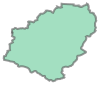

In [2]:
import osmnx as ox
import pandas as pd
from shapely.geometry import Point

# 성남시 경계 polygon 가져오기
gdf = ox.geocode_to_gdf("Seongnam-si, South Korea")
seongnam_poly = gdf.loc[0, "geometry"]   # polygon

seongnam_poly

In [3]:
df = pd.read_csv("passenger_data.csv")


In [4]:
df["ride_in_seongnam"] = df.apply(
    lambda row: seongnam_poly.contains(Point(row["ride_lon"], row["ride_lat"])),
    axis=1
)

df["alight_in_seongnam"] = df.apply(
    lambda row: seongnam_poly.contains(Point(row["alight_lon"], row["alight_lat"])),
    axis=1
)

# 탑승 + 하차 모두 성남시 내부
seongnam_passengers = df[
    df["ride_in_seongnam"] & df["alight_in_seongnam"]
].copy()

seongnam_passengers


ID  ride_time   ride_lat    ride_lon  alight_lat  alight_lon  \
0          0          1  37.459616  127.166166   37.459019  127.170290   
1          1          3  37.437323  127.162918   37.437306  127.163380   
2          2          1  37.442917  127.155426   37.446060  127.164124   
3          3          4  37.365923  127.108088   37.368581  127.115684   
4          4          0  37.386889  127.125926   37.370379  127.127241   
...      ...        ...        ...         ...         ...         ...   
24419  24419       1437  37.432369  127.128935   37.429175  127.148971   
24420  24420       1437  37.435029  127.139100   37.444739  127.129692   
24421  24421       1424  37.440365  127.129997   37.357845  127.123543   
24422  24422       1415  37.386393  127.125441   37.365293  127.067756   
24423  24423       1436  37.458056  127.164123   37.374476  127.144816   

       dispatch_time  type  ride_in_seongnam  alight_in_seongnam  
0                  0     0              True                True  
1                  0     0              True                True  
2                  0     0              True                True  
3                  0     0              True                True  
4                  0     0              True                True  
...              ...   ...               ...                 ...  
24419              0     0              True                True  
24420              0     0              True                True  
24421              0     0              True                True  
24422              0     0              True                True  
24423              0     0              True                True  

[19141 rows x 10 columns]

In [5]:
morning_calls = seongnam_passengers[
    seongnam_passengers["ride_time"].between(420, 600)
]

morning_calls

ID  ride_time   ride_lat    ride_lon  alight_lat  alight_lon  \
764      764        423  37.394272  127.109690   37.383970  127.124004   
766      766        429  37.441185  127.132164   37.446075  127.141556   
768      768        422  37.444947  127.144060   37.411290  127.126024   
769      769        427  37.389317  127.113098   37.403320  127.099747   
770      770        425  37.411650  127.163463   37.412335  127.129262   
...      ...        ...        ...         ...         ...         ...   
23733  23733        589  37.368720  127.114776   37.393772  127.112299   
23734  23734        587  37.451842  127.158727   37.407869  127.144092   
23736  23736        595  37.445339  127.127029   37.439171  127.143433   
23738  23738        599  37.444733  127.166497   37.443593  127.178967   
23741  23741        590  37.458609  127.162378   37.394982  127.109509   

       dispatch_time  type  ride_in_seongnam  alight_in_seongnam  
764                0     0              True                True  
766                0     0              True                True  
768                0     0              True                True  
769                0     0              True                True  
770                0     0              True                True  
...              ...   ...               ...                 ...  
23733              0     0              True                True  
23734              0     0              True                True  
23736              0     0              True                True  
23738              0     0              True                True  
23741              0     0              True                True  

[3356 rows x 10 columns]

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import osmnx as ox

# 성남시 경계 추출
seongnam = ox.geocode_to_gdf('Seongnam, South Korea')

# 아래와 같은 결과가 도출되어야 합니다.

In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import osmnx as ox

# 1. 성남시 폴리곤 가져오기
seongnam = ox.geocode_to_gdf("Seongnam-si, South Korea")
seongnam_poly = seongnam.loc[0, "geometry"]

# 2. 승객 데이터 불러오기
df = pd.read_csv("passenger_data.csv")

# 3. GeoDataFrame으로 변환 (탑승 위치 기준)
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["ride_lon"], df["ride_lat"]),
    crs="EPSG:4326"
)

# 4. 성남시 안에서 탑승한 승객만
gdf_sn = gdf[gdf.within(seongnam_poly)].copy()

# 5. morning_calls: 오전 7시(420분)~10시(600분) 사이 호출
morning_calls = gdf_sn[gdf_sn["ride_time"].between(420, 600)].copy()

# 6. 성남시 폴리곤 먼저 그림
m = seongnam.explore(
    style_kwds={
        "color": "red",
        "weight": 3,
        "fillColor": "#d9b38c",
        "fillOpacity": 0.3,
    }
)

# 7. morning_calls만 ride_time 색으로 올리기
morning_calls.explore(
    m=m,
    column="ride_time",                 # 색 기준
    cmap="viridis",
    legend=True,                        # 위에 컬러바
    tooltip=["ID", "ride_time", "ride_lat", "ride_lon"],  # 마우스 올리면 뜨는 정보
    marker_kwds={"radius": 4}
)

m  # VS Code / Jupyter에서 이 셀 실행하면 바로 지도 뜸


3. 운행하는 택시의 데이터도 구축해봅시다. 해당 시간에 운행중인 택시는 총 100대 입니다. 택시 100대를 성남시 내의 임의의 지역에 위치시켜 vehicle_df라는 데이터프레임을 만들어봅시다. 각 택시는 vehicle_id, lat, lon 컬럼을 가집니다. 생성한 택시를 지도상에 시각화 해봅시다. 

> hint: 2장에서 배운 `osmnx` 패키지를 사용하세요. 성남시 도로네트워크 그래프를 불러와, 그래프의 임의의 노드에 택시를 생성할 수 있습니다. 성남시 도로네트워크는 `.graphml`로 저장할 수 있고 이 파일은 아래와 같이 열 수 있습니다. 

In [7]:
import random

# 시드 설정
random.seed(42)
np.random.seed(42)

# 성남시의 도로 네트워크 가져오기
graph_file = 'seongnam_graph.graphml'

if os.path.exists(graph_file):
    print(f"🚗 저장된 도로 네트워크 불러오는 중... ({graph_file})")
    G = ox.load_graphml(graph_file)
    print(f"✅ 도로 네트워크 로드 완료: {len(G.nodes())} 노드, {len(G.edges())} 엣지")
else:
    print("🚗 성남시 도로 네트워크 다운로드 중...")
    G = ox.graph_from_place('Seongnam, South Korea', network_type='drive')
    print(f"✅ 도로 네트워크 다운로드 완료: {len(G.nodes())} 노드, {len(G.edges())} 엣지")
    
    # 그래프를 파일로 저장
    ox.save_graphml(G, graph_file)
    print(f"💾 도로 네트워크 저장 완료: {graph_file}")

# 도로 네트워크의 노드를 GeoDataFrame으로 변환
nodes, edges = ox.graph_to_gdfs(G)

# 아래와 같이 생성한 택시가 성남시 내에 존재해야 합니다.

🚗 저장된 도로 네트워크 불러오는 중... (seongnam_graph.graphml)
✅ 도로 네트워크 로드 완료: 4849 노드, 13073 엣지


In [8]:
import os
import random
import numpy as np
import pandas as pd
import geopandas as gpd
import osmnx as ox

# 시드 설정
random.seed(42)
np.random.seed(42)

# 성남시의 도로 네트워크 가져오기
graph_file = 'seongnam_graph.graphml'

if os.path.exists(graph_file):
    print(f"🚗 저장된 도로 네트워크 불러오는 중... ({graph_file})")
    G = ox.load_graphml(graph_file)
    print(f"✅ 도로 네트워크 로드 완료: {len(G.nodes())} 노드, {len(G.edges())} 엣지")
else:
    print("🚗 성남시 도로 네트워크 다운로드 중...")
    G = ox.graph_from_place('Seongnam, South Korea', network_type='drive')
    print(f"✅ 도로 네트워크 다운로드 완료: {len(G.nodes())} 노드, {len(G.edges())} 엣지")
    
    # 그래프를 파일로 저장
    ox.save_graphml(G, graph_file)
    print(f"💾 도로 네트워크 저장 완료: {graph_file}")

# 도로 네트워크의 노드를 GeoDataFrame으로 변환
nodes, edges = ox.graph_to_gdfs(G)

# --------------------------------------------------
# 3. 임의의 100개 노드에 택시 배치
# --------------------------------------------------
sampled_nodes = nodes.sample(n=100, random_state=42)

vehicle_df = pd.DataFrame({
    "vehicle_id": range(100),
    "lat": sampled_nodes["y"].values,   # 위도
    "lon": sampled_nodes["x"].values,   # 경도
    "node_id": sampled_nodes.index      # 노드 ID (그래프 노드)
}).reset_index(drop=True)

print(f"✅ 택시 배치 완료: {len(vehicle_df)}대 (도로 네트워크 노드 위)")
print(vehicle_df.head(10))

# --------------------------------------------------
# 4. OSM 위에 택시 100대 시각화
# --------------------------------------------------
# vehicle_df를 GeoDataFrame으로 변환
vehicle_gdf = gpd.GeoDataFrame(
    vehicle_df,
    geometry=gpd.points_from_xy(vehicle_df["lon"], vehicle_df["lat"]),
    crs="EPSG:4326"
)

# explore()는 기본적으로 OSM 타일을 배경으로 사용하는 folium 지도 생성
m = vehicle_gdf.explore(
    tooltip=["vehicle_id", "lat", "lon", "node_id"],  # 마우스 올렸을 때 정보
    marker_kwds={"radius": 6, "color": "red", "fill": True, "fill_opacity": 0.9}
)

m  # VS Code / Jupyter에서 이 셀 실행하면 OSM 위에 빨간 택시 100대가 보임


🚗 저장된 도로 네트워크 불러오는 중... (seongnam_graph.graphml)
✅ 도로 네트워크 로드 완료: 4849 노드, 13073 엣지
✅ 택시 배치 완료: 100대 (도로 네트워크 노드 위)
   vehicle_id        lat         lon      node_id
0           0  37.449414  127.163243   5430522538
1           1  37.413322  127.136450   2937656651
2           2  37.457025  127.168564   2482182264
3           3  37.377380  127.046864  12872692103
4           4  37.441322  127.164218   2921077320
5           5  37.454335  127.165189   2482182215
6           6  37.385245  127.110829   4279349527
7           7  37.386402  127.127243   7983934908
8           8  37.412660  127.099929   6265061977
9           9  37.442212  127.151484   6652642782


4. 위 데이터로 택시가 승객을 태우고 목적지까지 데려다주는 택시 시뮬레이션을 구축해보세요. 매분마다 배차(승객과 차량을 매칭시키는 과정)가 발생한다고 가정 합시다. 오전 7시-10시 사이이기 때문에 이론상 총 180번의 배차가 발생할 것입니다. React로 시각화 해봅시다. 시각화 결과 react app을 github에 호스팅해서 링크를 제출하세요.


In [13]:
import os
import json
from typing import List
import numpy as np
import pandas as pd
import networkx as nx
import osmnx as ox

# ----------------------------------------------------------
# 0. 입력: morning_calls가 이미 준비돼 있다고 가정
#    morning_calls = seongnam_passengers[ ... ] 로 만든 DataFrame
# ----------------------------------------------------------

df = morning_calls.copy().reset_index(drop=True)

# 필요한 컬럼 체크
required_cols = ["ID", "ride_time", "ride_lat", "ride_lon", "alight_lat", "alight_lon"]
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"필수 컬럼 누락: {col}")

# ----------------------------------------------------------
# 1. 시뮬레이션 시간(0~180) 계산
# ----------------------------------------------------------
START_MIN = 420  # 07:00
df["sim_time"] = df["ride_time"] - START_MIN
df = df.sort_values("sim_time").reset_index(drop=True)


# ----------------------------------------------------------
# 2. 도로 네트워크 로드
# ----------------------------------------------------------
GRAPH_FILE = "seongnam_graph.graphml"

if os.path.exists(GRAPH_FILE):
    G = ox.load_graphml(GRAPH_FILE)
else:
    G = ox.graph_from_place("Seongnam, South Korea", network_type="drive")
    ox.save_graphml(G, GRAPH_FILE)

nodes_gdf, _ = ox.graph_to_gdfs(G)


# ----------------------------------------------------------
# 3. 승차/하차를 도로 노드에 스냅
# ----------------------------------------------------------
df["origin_node"] = ox.distance.nearest_nodes(
    G, X=df["ride_lon"].values, Y=df["ride_lat"].values
)

df["dest_node"] = ox.distance.nearest_nodes(
    G, X=df["alight_lon"].values, Y=df["alight_lat"].values
)


# ----------------------------------------------------------
# 4. 초기 차량 배치 (시작 시간 0)
# ----------------------------------------------------------
N_VEHICLES = 100
sampled_nodes = nodes_gdf.sample(n=N_VEHICLES, random_state=42)

vehicles = pd.DataFrame({
    "vehicle_id": range(N_VEHICLES),
    "current_node": sampled_nodes.index,
    "available_time": 0.0,
})
vehicles["lon"] = [G.nodes[n]["x"] for n in vehicles["current_node"]]
vehicles["lat"] = [G.nodes[n]["y"] for n in vehicles["current_node"]]


# ----------------------------------------------------------
# 5. 경로 계산 유틸
# ----------------------------------------------------------
def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

def path_length_km(G, path):
    total_m = 0.0
    for u, v in zip(path[:-1], path[1:]):
        data = G.get_edge_data(u, v)
        if isinstance(data, dict) and 0 in data:
            edge_attr = data[0]
        else:
            edge_attr = list(data.values())[0] if isinstance(data, dict) else data
        total_m += float(edge_attr.get("length", 0.0))
    return total_m / 1000.0

def path_to_lonlat(G, path):
    return [[float(G.nodes[n]["x"]), float(G.nodes[n]["y"])] for n in path]


# ----------------------------------------------------------
# 6. 시뮬레이션 실행
# ----------------------------------------------------------
SPEED_KM_PER_H = 30.0
SPEED_KM_PER_MIN = SPEED_KM_PER_H / 60.0

TRIPS = []
PASSENGER_MARKERS = []

for idx, p in df.iterrows():
    p_id = int(p["ID"])
    ride_t = float(p["sim_time"])  # already 0~180
    o_node = p["origin_node"]
    d_node = p["dest_node"]

    # 승객과 가장 가까운 차량 1대 선택
    dists = haversine_km(
        p["ride_lat"], p["ride_lon"],
        vehicles["lat"].values, vehicles["lon"].values
    )
    best_j = int(np.argmin(dists))
    veh = vehicles.loc[best_j]

    # 이 차량이 실제로 출발 가능한 시간
    start_time = max(veh["available_time"], ride_t)

    # 도로 shortest path
    try:
        path1 = nx.shortest_path(G, veh["current_node"], o_node, weight="length")
        path2 = nx.shortest_path(G, o_node, d_node, weight="length")
    except nx.NetworkXNoPath:
        continue

    dist1 = path_length_km(G, path1)
    dist2 = path_length_km(G, path2)

    dur1 = dist1 / SPEED_KM_PER_MIN
    dur2 = dist2 / SPEED_KM_PER_MIN

    route = []
    times = []
    t = start_time

    # segment 1
    coords1 = path_to_lonlat(G, path1)
    if coords1:
        step = dur1 / max(len(coords1) - 1, 1)
        for c in coords1:
            route.append(c)
            times.append(t)
            t += step

    # segment 2
    coords2 = path_to_lonlat(G, path2)[1:]
    if coords2:
        step = dur2 / max(len(coords2), 1)
        for c in coords2:
            route.append(c)
            times.append(t)
            t += step

    TRIPS.append({
        "route": route,
        "timestamp": [float(tt) for tt in times],  # 0~180
    })

    PASSENGER_MARKERS.append({
        "passenger_id": p_id,
        "location": [float(p["ride_lon"]), float(p["ride_lat"])],
        "timestamp": [
            float(ride_t),
            float(start_time + dur1)
        ]
    })

    # 차량 상태 업데이트
    vehicles.at[best_j, "current_node"] = d_node
    vehicles.at[best_j, "available_time"] = t
    vehicles.at[best_j, "lon"] = G.nodes[d_node]["x"]
    vehicles.at[best_j, "lat"] = G.nodes[d_node]["y"]


# ----------------------------------------------------------
# 7. JSON 저장
# ----------------------------------------------------------
PUBLIC_DATA_DIR = os.path.join("simulation_vis", "public", "data")
os.makedirs(PUBLIC_DATA_DIR, exist_ok=True)

with open(os.path.join(PUBLIC_DATA_DIR, "trips.json"), "w", encoding="utf-8") as f:
    json.dump(TRIPS, f)

with open(os.path.join(PUBLIC_DATA_DIR, "passengers.json"), "w", encoding="utf-8") as f:
    json.dump(PASSENGER_MARKERS, f)

print("✅ JSON 생성 완료!")
print(f"trips: {len(TRIPS)} / passengers: {len(PASSENGER_MARKERS)}")


✅ JSON 생성 완료!
trips: 2438 / passengers: 2438


5. 택시의 서비스 수준을 평가해봅시다. 승객들이 택시를 탑승하기 위해 대기하는 시간의 총합과 평균 대기시간을 얼마인가요? 택시의 수를 200대, 300대로 늘렸을 때 대기시간이 얼마로 감소하나요? 

In [14]:
import numpy as np
import pandas as pd
import networkx as nx
import osmnx as ox
import json

# ----------------------------------------------------------
# 0. 입력: morning_calls, G(성남 도로 네트워크 그래프)
# ----------------------------------------------------------

df = morning_calls.copy().reset_index(drop=True)
START_MIN = 420  # 07:00
df["sim_time"] = df["ride_time"] - START_MIN
df = df.sort_values("sim_time").reset_index(drop=True)

# 승차 노드/하차 노드 스냅
df["origin_node"] = ox.distance.nearest_nodes(
    G, X=df["ride_lon"].values, Y=df["ride_lat"].values
)
df["dest_node"] = ox.distance.nearest_nodes(
    G, X=df["alight_lon"].values, Y=df["alight_lat"].values
)

# ----------------------------------------------------------
# 시뮬레이션 공통 함수 (100/200/300대에 모두 사용)
# ----------------------------------------------------------

def path_length_km(G, path):
    total = 0
    for u, v in zip(path[:-1], path[1:]):
        data = G.get_edge_data(u, v)
        if isinstance(data, dict) and 0 in data:
            attr = data[0]
        else:
            attr = list(data.values())[0]
        total += attr.get("length", 0)
    return total / 1000.0

def simulate_waiting_time(G, df, vehicle_count=100, speed_km_h=30):
    SPEED_KM_MIN = speed_km_h / 60.0

    # 초기 차량 배치
    nodes_gdf, _ = ox.graph_to_gdfs(G)
    sampled = nodes_gdf.sample(n=vehicle_count, random_state=42)

    vehicles = pd.DataFrame({
        "vehicle_id": range(vehicle_count),
        "node": sampled.index,
        "available": 0.0,   # 차량이 새로운 승객을 받을 수 있는 시각
    })
    vehicles["lon"] = [G.nodes[n]["x"] for n in vehicles["node"]]
    vehicles["lat"] = [G.nodes[n]["y"] for n in vehicles["node"]]

    waiting_times = []  # 승객별 대기시간 기록

    for _, p in df.iterrows():
        ride_t = p["sim_time"]
        origin = p["origin_node"]
        dest = p["dest_node"]

        # (1) 가장 가까운 차량 선택
        dists = np.sqrt((vehicles["lat"] - p["ride_lat"])**2 + (vehicles["lon"] - p["ride_lon"])**2)
        j = int(np.argmin(dists))
        v = vehicles.loc[j]

        # 차량이 실제 출발 가능한 시각
        start_time = max(float(v["available"]), float(ride_t))

        # (2) 도로 shortest path
        try:
            path1 = nx.shortest_path(G, v["node"], origin, weight="length")
            path2 = nx.shortest_path(G, origin, dest, weight="length")
        except nx.NetworkXNoPath:
            continue

        dist1 = path_length_km(G, path1)
        dist2 = path_length_km(G, path2)

        dur1 = dist1 / SPEED_KM_MIN
        dur2 = dist2 / SPEED_KM_MIN

        # 🚨 핵심! 대기시간 = 차량이 승객에게 도착하는 시간 - 요청시간
        pickup_time = start_time + dur1
        wait_time = pickup_time - ride_t
        waiting_times.append(wait_time)

        # 차량 업데이트
        vehicles.at[j, "node"] = dest
        vehicles.at[j, "available"] = pickup_time + dur2
        vehicles.at[j, "lon"] = p["alight_lon"]
        vehicles.at[j, "lat"] = p["alight_lat"]

    return waiting_times


# ----------------------------------------------------------
# 100대 / 200대 / 300대 비교 실행
# ----------------------------------------------------------

results = {}

for N in [100, 200, 300]:
    print(f"🚕 차량 {N}대 시뮬레이션 중...")
    waits = simulate_waiting_time(G, df, vehicle_count=N)
    waits = np.array(waits)

    results[N] = {
        "total_wait": waits.sum(),
        "avg_wait": waits.mean(),
        "max_wait": waits.max(),
        "count": len(waits)
    }

# ----------------------------------------------------------
# 출력
# ----------------------------------------------------------

for N in results:
    print("\n===============================")
    print(f" 🚕 차량 {N}대 결과")
    print("===============================")
    print(f"승객 수 : {results[N]['count']}")
    print(f"총 대기시간 : {results[N]['total_wait']:.2f} 분")
    print(f"평균 대기시간 : {results[N]['avg_wait']:.2f} 분")
    print(f"최대 대기시간 : {results[N]['max_wait']:.2f} 분")


🚕 차량 100대 시뮬레이션 중...
🚕 차량 200대 시뮬레이션 중...
🚕 차량 300대 시뮬레이션 중...

 🚕 차량 100대 결과
승객 수 : 1301
총 대기시간 : 180810.59 분
평균 대기시간 : 138.98 분
최대 대기시간 : 784.86 분

 🚕 차량 200대 결과
승객 수 : 2237
총 대기시간 : 199487.46 분
평균 대기시간 : 89.18 분
최대 대기시간 : 544.14 분

 🚕 차량 300대 결과
승객 수 : 2581
총 대기시간 : 182129.21 분
평균 대기시간 : 70.57 분
최대 대기시간 : 687.75 분


In [16]:
import numpy as np
import pandas as pd
import networkx as nx
import osmnx as ox

# ----------------------------------------------------------
# 0. 입력: morning_calls, G(성남 도로 네트워크 그래프)
# ----------------------------------------------------------

df = morning_calls.copy().reset_index(drop=True)

START_MIN = 420  # 07:00
df["sim_time"] = df["ride_time"] - START_MIN
df = df.sort_values("sim_time").reset_index(drop=True)

# 승차 / 하차 노드 스냅 (이미 되어 있다면 생략 가능)
df["origin_node"] = ox.distance.nearest_nodes(
    G, X=df["ride_lon"].values, Y=df["ride_lat"].values
)
df["dest_node"] = ox.distance.nearest_nodes(
    G, X=df["alight_lon"].values, Y=df["alight_lat"].values
)

# ----------------------------------------------------------
# 공통 유틸: 경로 길이(km) 계산
# ----------------------------------------------------------
def path_length_km(G, path):
    total = 0.0
    for u, v in zip(path[:-1], path[1:]):
        data = G.get_edge_data(u, v)
        if data is None:
            continue
        if isinstance(data, dict) and 0 in data:
            attr = data[0]
        else:
            attr = list(data.values())[0]
        total += float(attr.get("length", 0.0))
    return total / 1000.0

# ----------------------------------------------------------
# 시뮬레이션 함수: 차량 N대로 돌리고 승객별 대기시간 리스트 반환
# ----------------------------------------------------------
def simulate_waiting_time(G, df, vehicle_count=100, speed_km_h=30.0):
    SPEED_KM_MIN = speed_km_h / 60.0

    nodes_gdf, _ = ox.graph_to_gdfs(G)
    sampled = nodes_gdf.sample(n=vehicle_count, random_state=42)

    vehicles = pd.DataFrame({
        "vehicle_id": range(vehicle_count),
        "node": sampled.index,
        "available": 0.0,   # 이 시간 이후에 새 승객 배차 가능
    })
    vehicles["lon"] = [G.nodes[n]["x"] for n in vehicles["node"]]
    vehicles["lat"] = [G.nodes[n]["y"] for n in vehicles["node"]]

    waiting_times = []  # 승객별 대기시간(분)
    # 원하면 passenger ID까지 같이 보고 싶으면 여기 dict로 넣어도 됨

    for _, p in df.iterrows():
        ride_t = float(p["sim_time"])         # 0~180
        origin = p["origin_node"]
        dest = p["dest_node"]

        # 1) 가장 가까운 차량 선택 (단순 거리 기준)
        dists = np.sqrt(
            (vehicles["lat"].values - p["ride_lat"])**2 +
            (vehicles["lon"].values - p["ride_lon"])**2
        )
        j = int(np.argmin(dists))
        v = vehicles.loc[j]

        # 이 차량이 실제로 출발 가능한 시각
        start_time = max(float(v["available"]), ride_t)

        # 2) 도로 shortest path
        try:
            path1 = nx.shortest_path(G, v["node"], origin, weight="length")
            path2 = nx.shortest_path(G, origin, dest, weight="length")
        except nx.NetworkXNoPath:
            # 경로 자체가 안 나오면 이 승객은 스킵
            continue

        dist1 = path_length_km(G, path1)
        dist2 = path_length_km(G, path2)

        dur1 = dist1 / SPEED_KM_MIN   # 차량→승객 이동시간
        dur2 = dist2 / SPEED_KM_MIN   # 승객→목적지 이동시간

        pickup_time = start_time + dur1
        wait_time = pickup_time - ride_t   # 🚕 대기시간(분)

        waiting_times.append(wait_time)

        # 차량 상태 업데이트 (실제로는 대기시간 상관없이 운행했다고 가정)
        vehicles.at[j, "node"] = dest
        vehicles.at[j, "available"] = pickup_time + dur2
        vehicles.at[j, "lon"] = p["alight_lon"]
        vehicles.at[j, "lat"] = p["alight_lat"]

    return np.array(waiting_times)


# ----------------------------------------------------------
# 30분 초과는 배차 실패로 처리하여 통계 계산
# ----------------------------------------------------------
THRESHOLD = 30.0  # 분

results = {}

for N in [100, 200, 300]:
    print(f"🚕 차량 {N}대 시뮬레이션 중...")
    waits = simulate_waiting_time(G, df, vehicle_count=N)
    waits = waits[np.isfinite(waits)]  # 혹시 NaN/inf 있으면 제거

    total_count = len(waits)
    success_mask = waits <= THRESHOLD
    success_waits = waits[success_mask]
    fail_waits = waits[~success_mask]

    results[N] = {
        "total_passengers": total_count,
        "success_count": len(success_waits),
        "fail_count": len(fail_waits),
        "total_wait_success": success_waits.sum() if len(success_waits) > 0 else 0.0,
        "avg_wait_success": success_waits.mean() if len(success_waits) > 0 else 0.0,
        "max_wait_success": success_waits.max() if len(success_waits) > 0 else 0.0,
        "max_wait_overall": waits.max() if total_count > 0 else 0.0,
    }

# ----------------------------------------------------------
# 결과 출력
# ----------------------------------------------------------
# ----------------------------------------------------------
# 결과 출력 (성공률 포함)
# ----------------------------------------------------------
for N in results:
    r = results[N]
    print("\n===============================")
    print(f" 🚕 차량 {N}대 결과 (대기 30분 이하 = 성공 배차)")
    print("===============================")
    print(f"전체 승객 수           : {r['total_passengers']}")
    print(f"성공 배차 승객 수      : {r['success_count']}")
    print(f"배차 실패 수           : {r['fail_count']}")
    print(f"성공률                 : {r['success_count'] / r['total_passengers'] * 100:.2f}%")
    print(f"성공 배차 총 대기시간  : {r['total_wait_success']:.2f} 분")
    print(f"성공 배차 평균 대기시간: {r['avg_wait_success']:.2f} 분")
    print(f"성공 배차 최대 대기시간: {r['max_wait_success']:.2f} 분")



🚕 차량 100대 시뮬레이션 중...
🚕 차량 200대 시뮬레이션 중...
🚕 차량 300대 시뮬레이션 중...

 🚕 차량 100대 결과 (대기 30분 이하 = 성공 배차)
전체 승객 수           : 1301
성공 배차 승객 수      : 376
배차 실패 수           : 925
성공률                 : 28.90%
성공 배차 총 대기시간  : 4147.84 분
성공 배차 평균 대기시간: 11.03 분
성공 배차 최대 대기시간: 29.99 분

 🚕 차량 200대 결과 (대기 30분 이하 = 성공 배차)
전체 승객 수           : 2237
성공 배차 승객 수      : 828
배차 실패 수           : 1409
성공률                 : 37.01%
성공 배차 총 대기시간  : 8514.15 분
성공 배차 평균 대기시간: 10.28 분
성공 배차 최대 대기시간: 29.99 분

 🚕 차량 300대 결과 (대기 30분 이하 = 성공 배차)
전체 승객 수           : 2581
성공 배차 승객 수      : 1205
배차 실패 수           : 1376
성공률                 : 46.69%
성공 배차 총 대기시간  : 12060.55 분
성공 배차 평균 대기시간: 10.01 분
성공 배차 최대 대기시간: 29.97 분


6. (보너스 문제)택시 정책의사결정자 관점에서 최적의 택시수를 판단해봅시다. 택시 1대를 추가로 공급하는데 드는 비용은 ###원이며, 승객의 시간가치는 ###원/분입니다. 시뮬레이션을 사용해서 최적의 택시 운행 대수를 찾을 수 있을까요? 택시의 수는 50의 배수로만 운영할 수 있다고 가정합시다 (i.e., 50,100,150,200,250,...). 시스템 전체의 비용을 최소화하는 택시의 수는 몇대인가요?  